In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df=pd.read_csv('socialmedia12.csv')

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Topic'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_similar_topics(topic_index):
    similar_scores = list(enumerate(cosine_sim[topic_index]))
    sorted_similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:4]  # Top 3 similar
    return [(df['Topic'][i], score) for i, score in sorted_similar_scores]

similar_topics = get_similar_topics(0)
print("Similar topics to 'Artificial Intelligence':", similar_topics)


Similar topics to 'Artificial Intelligence': [('Machine Learning', 0.0), ('Cooking', 0.0), ('Vegan Recipes', 0.0)]


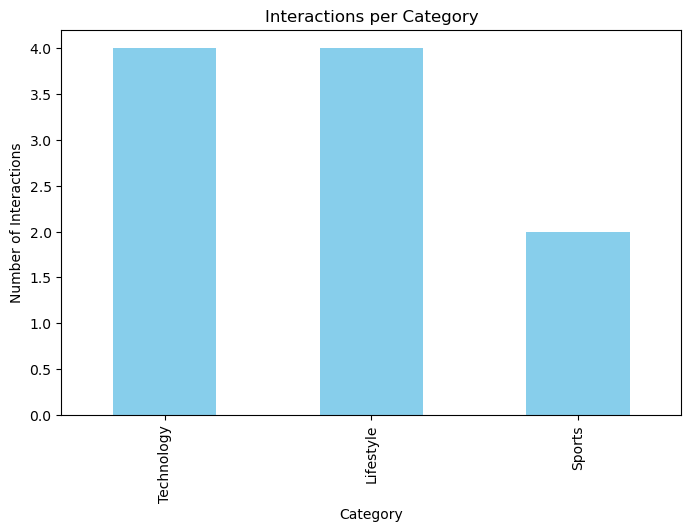

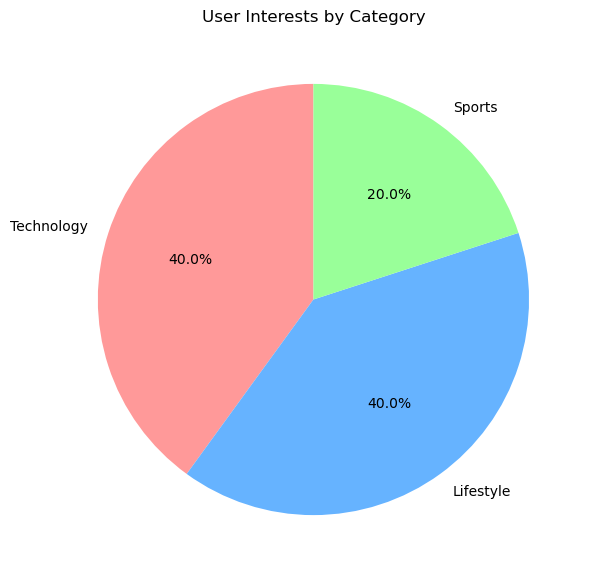

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Interactions per Category')
plt.xlabel('Category')
plt.ylabel('Number of Interactions')
plt.show()

category_distribution = df['Category'].value_counts()
plt.figure(figsize=(7, 7))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title('User Interests by Category')
plt.ylabel('')
plt.show()
